In [9]:
# ============================================
# BLOQUE 1.1 - IMPORTACIÓN DE LIBRERÍAS ESPECÍFICAS PARA PREPROCESAMIENTO
# ============================================

# Librerías para manipulación de datos
import pandas as pd
import numpy as np
import os  # <-- esta línea era la que faltaba

# Librerías para preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Librerías cargadas exitosamente.")


✅ Librerías cargadas exitosamente.


In [10]:
# ============================================
# BLOQUE 1.2 - CARGA DEL DATASET COMBINADO (PARA PREPROCESAMIENTO)
# ============================================

# Definir la ruta base del dataset
base_path = '../data/UCI HAR Dataset/'

# Cargar archivos necesarios
X_train = pd.read_csv(os.path.join(base_path, 'train', 'X_train.txt'), sep=r'\s+', header=None)
y_train = pd.read_csv(os.path.join(base_path, 'train', 'y_train.txt'), header=None, names=['activity'])
subjects_train = pd.read_csv(os.path.join(base_path, 'train', 'subject_train.txt'), header=None, names=['subject'])
features = pd.read_csv(os.path.join(base_path, 'features.txt'), sep=r'\s+', header=None, names=['index', 'feature_name'])

# Asignar nombres de columnas a X_train
X_train.columns = features['feature_name']

# Combinar en un solo DataFrame
df_train = pd.concat([subjects_train, y_train, X_train], axis=1)

print("✅ Dataset combinado cargado exitosamente.")


✅ Dataset combinado cargado exitosamente.


ℹ️ Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, subject to angle(Z,gravityMean)
dtypes: float64(561), int64(2)
memory usage: 31.6 MB

🔍 Verificando valores nulos:
subject                                 0
activity                                0
tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 563, dtype: int64


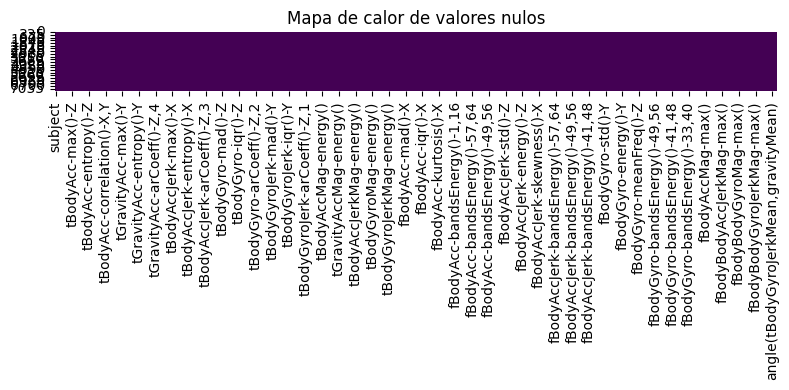

In [11]:
# ============================================
# BLOQUE 2 - CARGA DEL DATASET Y VERIFICACIÓN DE NULOS
# ============================================

# Nota: Si ya tienes df_train en memoria, puedes omitir volver a cargarlo.
# En caso de que no esté, debes cargarlo desde donde lo guardaste.
# Aquí asumimos que seguimos trabajando en la misma sesión de Jupyter.

# Verificar información general del DataFrame
print("ℹ️ Información general del dataset:")
df_train.info()

# Verificar si existen valores nulos
print("\n🔍 Verificando valores nulos:")
print(df_train.isnull().sum())

# Visualizar porcentaje de nulos si existiera (gráfico opcional)
plt.figure(figsize=(8, 4))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.tight_layout()
plt.show()


In [13]:
# ============================================
# BLOQUE 3 - SEPARACIÓN DE VARIABLES X (ENTRADA) E y (OBJETIVO)
# ============================================

# Variables predictoras (todas las columnas de características)
X = df_train.iloc[:, 2:]  # Desde columna 2 hasta el final (ignoramos 'subject' y 'activity')

# Variable objetivo (clasificación de actividad como número: 1 a 6)
y = df_train['activity']

# Mostrar forma de X e y
print(f"✅ X tiene forma: {X.shape} → {X.shape[0]} registros y {X.shape[1]} variables predictoras.")
print(f"🎯 y tiene forma: {y.shape} → {len(y.unique())} clases diferentes: {sorted(y.unique())}")


✅ X tiene forma: (7352, 561) → 7352 registros y 561 variables predictoras.
🎯 y tiene forma: (7352,) → 6 clases diferentes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


In [14]:
# ============================================
# BLOQUE 4 - DIVISIÓN DEL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA (80/20)
# ============================================

# División en 80% entrenamiento y 20% prueba
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Mostrar tamaños resultantes
print(f"✅ Conjunto de entrenamiento: {X_train_split.shape[0]} muestras")
print(f"🧪 Conjunto de prueba: {X_test_split.shape[0]} muestras")


✅ Conjunto de entrenamiento: 5881 muestras
🧪 Conjunto de prueba: 1471 muestras


In [15]:
# ============================================
# BLOQUE 5 - ESCALADO DE VARIABLES NUMÉRICAS CON STANDARD SCALER
# ============================================

# Crear instancia del escalador
scaler = StandardScaler()

# Ajustar el escalador SOLO con los datos de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train_split)
X_test_scaled = scaler.transform(X_test_split)

# Mostrar forma como validación
print(f"✅ X_train_scaled shape: {X_train_scaled.shape}")
print(f"✅ X_test_scaled shape: {X_test_scaled.shape}")


✅ X_train_scaled shape: (5881, 561)
✅ X_test_scaled shape: (1471, 561)
